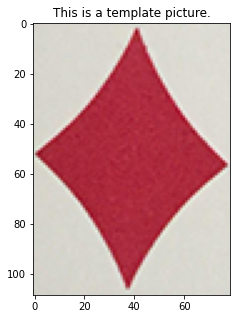

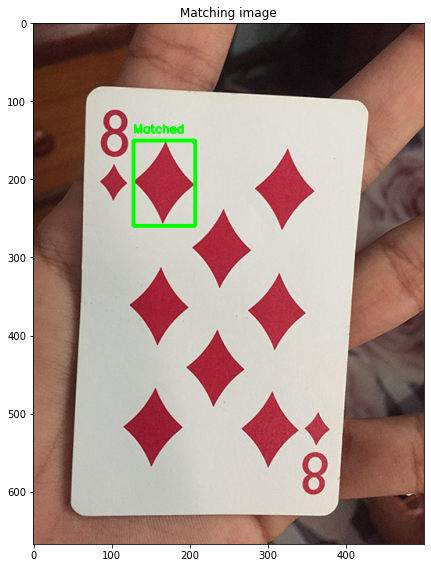

In [5]:
import cv2
from matplotlib import pyplot as plt

#Create path, load image and template
path1 = r'images/coke_bottle.png' #image
path2 = r'images/coke_logo.png' #template
path3 = r'images/coke_bottle_rotated.png' #rotated image
path4 = r'images/8_diamonds.png'
path5 = r'images/diamonds_template.png'
#Read image to variable
image = cv2.imread(path4)
template = cv2.imread(path5)
#Convert color domain to RGB and grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
imageGray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

#Perform template matching
result = cv2.matchTemplate(imageGray, templateGray, cv2.TM_CCOEFF_NORMED)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)

#Find the starting and ending (x, y) coordinate of the bounding box
(startX, startY) = maxLoc
endX = startX + template.shape[1]
endY = startY + template.shape[0]

#Draw the bounding box of matching position on image
cv2.rectangle(image, (startX, startY), (endX, endY), (0,255,0), 3)
cv2.putText(image, "Matched", (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

#Show output image with Matplotlib
fig1 = plt.figure(figsize=(6,5))
ax = fig1.add_subplot(1,1,1)
ax.set_title("This is a template picture.")
ax.imshow(template)

fig2 = plt.figure(figsize=(7,12))
ax = fig2.add_subplot(1,1,1)
ax.set_title("Matching image")
ax.imshow(image)